<a href="https://colab.research.google.com/github/Venettov/Riveraruiz_GIS/blob/main/PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install geopandas==1.0.1
!pip install mapclassify
!pip install geopandas folium
!pip install requests
!pip install geopandas bokeh
!pip install geopandas plotly
!pip install hvplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 8.9 MB/s eta 0:00:00


# **TITLE**

### *Exploring Population Rates, Employment, and Demographic Data: A GIS Project in Puerto Rico*


#**DESCRIPTION**

### *The primary objective of this project is to analyze and compare population and employment rates across the various towns of Puerto Rico*

#**DATASET SOURCES**

### Population Density Data:

#### https://censo.estadisticas.pr/EstimadosPoblacionales

## Employment Data:

#### https://indicadores.pr/dataset/tasa-desempleo-municipio-area/resource/8de254b0-b769-4a4e-b145-9a6975369b91

## Demographic Data:

#### https://censo.estadisticas.pr/node/520

Puerto Rico has faced natural disasters, corruption, mismanagement by local government, and mass emigration that has resulted in a critical loss of professionals and has essentially reduced the island’s student population to levels I never imagined. I myself emigrated after finishing college in search of better job opportunities.

As indicated by the State Data Center of Puerto Rico’s website (https://censo.estadisticas.pr/), the population has been declining for decades and the pace has accelerated in recent years. The exodus, which includes a large portion of young people, has accelerated the aging of the population. I have even noticed this personally when I visit the island; my village is mostly occupied by people over 50 years old. As a direct consequence, the birth rate is also low. The government has also closed many schools due to the drop in student numbers and as an austerity measure in the face of the economic crisis.

To counteract the loss of population, Puerto Rico must adopt measures that shore up its economy, security, education and expand employment opportunities. Population data analysis presentation can be used to support tax reforms and enhance the island’s attractions. Data and its proper use can help to have a better Puerto Rico.

## Financial and fiscal information of Puerto Rico:

#### https://www.observatoriofiscalpr.com/
The Fiscal Observatory is a tool that democratizes the financial and fiscal information of Puerto Rico, making it accessible to both the expert and the general public. Data is based on official information from the government of Puerto Rico. The platform includes comments and publications from analysts and experts on budget, debt, municipalities and recovery.



PowerPoint Presentation can be found here: https://docs.google.com/presentation/d/1r9lAIqgIn-_p_r7o26OUGFjqqKsFoF7F/edit?usp=drive_link&ouid=110511681741527599696&rtpof=true&sd=true

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #visualization library
import geopandas as gpd #gis/maps library

import mapclassify
import requests

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe

from decimal import Decimal, ROUND_HALF_UP




In [3]:

# The shapefile informatition was downloaded from: https://data.humdata.org/dataset/cod-ab-pri?
# I could donwload the zile file directly from the source and get the same result (line below)
#! wget -q -O pr-counties.zip https://data.humdata.org/dataset/e71a08a7-8529-4964-9ad7-7319e6ec05f8/resource/d3b8f932-16cf-4ecb-89b8-c2611922fcb4/download/pri_adm_2019_shp.zip

# I saved the file on Google Drive and created the link below:

! wget -q -O pr-counties.zip https://drive.google.com/uc?id=14I-sv4Q-3oCtdNXerqPGJZ9QkG37b48C&export=download

zip_ref = zipfile.ZipFile('pr-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
prC0=gpd.read_file('original/pri_admbnda_adm1_2019.shp') #load the shapefile with gpd as prC
prC1=gpd.read_file('original/pri_admbndl_ALL_2019.shp') #load the shapefile with gpd as prC



In [4]:
     #The file below is Población_total_en_Municipios_2020-2023.csv
#This file was downloaded from: https://censo.estadisticas.pr/EstimadosPoblacionales
! wget -q -O population.csv https://drive.google.com/uc?id=1PNPIPJO03Qv97wvvpGgkf018pp3ORp_9&export=download
#df_pop = pd.read_csv("population.csv")

# Read the Excel file
df = pd.read_excel("https://docs.google.com/uc?id=1BUHN_8oYFdiOVKBTQKxXZYD2HHmYnZXq&export=download")

# Save the DataFrame to a CSV file
df.to_csv("output.csv", index=False)

# Read the CSV file with float values
df_population = pd.read_csv("output.csv", dtype={'2023': float})

df_population.dtypes

#The file below is pr_unemployment_rates.csv
#This file was downloaded from: https://indicadores.pr/dataset/tasa-desempleo-municipio-area/resource/8de254b0-b769-4a4e-b145-9a6975369b91
! wget -q -O unem.csv https://drive.google.com/uc?id=1Ix9WCtGqJAHmptO6BdbD826lvKhKpPzE&export=download
#df_unemployment = pd.read_csv("unem.csv")


# Read the Excel file
df_unemp = pd.read_excel("https://docs.google.com/uc?id=1Okd--IC4hkcBnCfG02yl5_7yHiCTUgIw&export=download")

# Save the DataFrame to a CSV file
df_unemp.to_csv("output.csv", index=False)

# Read the CSV file with float values
df_unemployment = pd.read_csv("output.csv")
#df_unemployment.dtypes


#The file below is datos_municipales.csv
#This file was downloaded from: https://censo.estadisticas.pr/node/520
! wget -q -O gen.csv https://drive.google.com/uc?id=18Au9nBwdMdG6GJqR5jz3qly8Yf3IzfuJ&export=download
#df_gen = pd.read_csv("gen.csv")

# Read the Excel file
df_g = pd.read_excel("https://docs.google.com/uc?id=1QNzLPNfzSVKfUJiqZiDWaeobk6RzMtVs&export=download")

# Save the DataFrame to a CSV file
df_g.to_csv("output.csv", index=False)

# Read the CSV file with float values
df_gen = pd.read_csv("output.csv")
#df_gen.dtypes




,0
Geographic Area,object
Municipio,object
"April 1, 2020 Estimates Base",float64
2020,float64
2021,float64
2022,float64
2023,float64


,0
ADM0_ES,object
ADM0_PCODE,object
ADM1_ES,object
ADM1_PCODE,object
geometry,geometry


<Axes: >

Text(0.5, 413.2132562375006, 'longitude')

Text(20.097222222222214, 0.5, 'latitude')

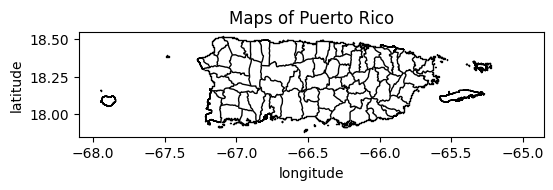

In [5]:
# The shape file contains geometry information on the limits of Puerto Rico and internal towns divisions
# I printed the information below and started exploring with it.

prC0.dtypes
#prC0.head(1)
#prC0.head()
#prC0.tail()
#prC0.shape
#prC0.columns
#prC0.explore()

fig1, ax = plt.subplots(1, figsize=(6,10))
prC1.plot(ax=ax,legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #
ax.title.set_text("Maps of Puerto Rico")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')

#prC1.plot()

In [6]:

# Some towns include special characters that gagve me some trouble when merging the Shapefile wkth the CSV files.
# I created the structure below to include all those towns and create a new Shapefile qith the name of towns without special characters

# Define the words to search for and their replacements
replacements = {
    'Mayagüez': 'Mayaguez',
    'Canóvanas': 'Canovanas',
    'Comerío': 'Comerio',
    'Manatí': 'Manati',
    'San Sebastián': 'San Sebastian',
    'San Germán': 'San German',
    'Rincón': 'Rincon',
    'Juana Díaz': 'Juana Diaz',
    'Loíza': 'Loiza',
    'Bayamón': 'Bayamon',
    'Río Grande': 'Rio Grande',
    'Las Marías': 'Las Marias',
    'Guánica': 'Guanica'
}

# Replace the words in the specified column (e.g., 'name' column)
for old_word, new_word in replacements.items():
    prC0['ADM1_ES'] = prC0['ADM1_ES'].str.replace(old_word, new_word)

# Save the modified shapefile
prC0.to_file('merged_shapefile.shp')
prC0=gpd.read_file('merged_shapefile.shp')



Reviewing what information is available in the CSV documents

In [7]:
# Below I'm exploring the data contained inside the csv file with populatition data.
df_population.columns



Index(['Geographic Area', 'Municipio', 'April 1, 2020 Estimates Base', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [8]:
# Below I'm exploring tha data contained inside the csv file with unemploymemnt data.
df_unemployment.columns


Index(['Municipio', '2020-08-01 00:00:00', '2020-07-01 00:00:00',
       '2020-06-01 00:00:00', '2020-05-01 00:00:00', '2020-04-01 00:00:00',
       '2020-03-01 00:00:00', '2020-02-01 00:00:00', '2020-01-01 00:00:00',
       '2019-12-01 00:00:00',
       ...
       '1990-12-01 00:00:00', '1990-11-01 00:00:00', '1990-10-01 00:00:00',
       '1990-09-01 00:00:00', '1990-08-01 00:00:00', '1990-07-01 00:00:00',
       '1990-06-01 00:00:00', '1990-05-01 00:00:00', '1990-04-01 00:00:00',
       '1990-03-01 00:00:00'],
      dtype='object', length=367)

In [9]:
# Below I'm exploring tha data contained inside the csv file with general populatition data.
df_gen.columns


Index(['Municipio', 'Año', 'Tasa de desempleo (por ciento)', 'Color',
       'Población de 65000 o más', 'Población ',
       'Tasa de participación laboral (por ciento)', 'Mediana de ingreso',
       'Población femenina (por ciento)',
       'Casados (por ciento de 15 años o más)',
       'Solteros (por ciento de  15 años o más)',
       'Población de 5-17 años (por ciento)',
       'Población de 5 años (por ciento)',
       'Mediana de valor de vivienda (miles de $)',
       'Viviendas alquiladas (por ciento)', 'Años de escolaridad (mediana)',
       'Promedio de ingreso familiar',
       'Familias bajo el nivel de pobreza (por ciento)',
       'Vivienda inadecuada (por ciento)', 'Población urbana (por ciento)'],
      dtype='object')

In [10]:
# Below I'm merging the general populatiton and the unemployment data using the town's name
df_pop_unem = pd.merge(df_population, df_unemployment, on='Municipio')
df_pop_unem.head(78)


,Geographic Area,Municipio,"April 1, 2020 Estimates Base",2020,2021,2022,2023,2020-08-01 00:00:00,2020-07-01 00:00:00,2020-06-01 00:00:00,...,1990-12-01 00:00:00,1990-11-01 00:00:00,1990-10-01 00:00:00,1990-09-01 00:00:00,1990-08-01 00:00:00,1990-07-01 00:00:00,1990-06-01 00:00:00,1990-05-01 00:00:00,1990-04-01 00:00:00,1990-03-01 00:00:00
0,".Adjuntas Municipio, Puerto Rico",Adjuntas,18020.0,18010.0,18025.0,17897.0,17900.0,10.8,9.4,10.4,...,13.7,13.4,15.0,15.0,16.8,13.5,19.4,21.5,22.1,21.1
1,".Aguada Municipio, Puerto Rico",Aguada,38136.0,38108.0,38003.0,37639.0,37528.0,8.7,7.6,9.2,...,20.0,19.6,22.0,19.7,18.2,14.9,19.4,19.0,20.8,23.7
2,".Aguadilla Municipio, Puerto Rico",Aguadilla,55101.0,55046.0,54614.0,53883.0,53622.0,9.1,8.1,9.3,...,19.0,18.2,18.4,17.8,18.4,14.9,19.4,20.0,20.3,20.9
3,".Aguas Buenas Municipio, Puerto Rico",Aguas Buenas,24223.0,24189.0,23976.0,23521.0,23274.0,9.5,8.3,9.9,...,18.7,17.4,18.9,17.4,16.8,13.2,16.0,16.7,18.5,20.6
4,".Aibonito Municipio, Puerto Rico",Aibonito,24637.0,24633.0,24680.0,24534.0,24602.0,8.5,7.5,8.7,...,12.1,12.3,13.5,12.0,13.2,10.5,11.9,11.2,11.5,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,".Vega Baja Municipio, Puerto Rico",Vega Baja,54414.0,54357.0,54227.0,53652.0,53527.0,11.7,10.1,12.0,...,17.1,16.2,17.3,15.7,15.7,13.0,17.6,16.7,16.1,16.4
74,".Vieques Municipio, Puerto Rico",Vieques,8249.0,8236.0,8171.0,8040.0,7999.0,10.5,8.4,9.5,...,12.9,12.3,11.8,9.4,11.3,9.7,14.6,14.2,15.4,16.6
75,".Villalba Municipio, Puerto Rico",Villalba,22093.0,22041.0,21817.0,21454.0,21285.0,9.3,7.8,8.6,...,19.5,18.6,20.3,18.8,24.4,20.0,26.2,25.3,30.0,29.3
76,".Yabucoa Municipio, Puerto Rico",Yabucoa,30426.0,30329.0,29944.0,29286.0,28897.0,9.7,8.2,9.4,...,20.4,19.8,22.0,21.2,23.0,17.0,22.7,21.6,23.9,28.6


In [11]:
# Below I'm merging the general populatiton, unemployment data, and genal populatiton data using the town's name
df_pop_unem_gen = pd.merge(df_pop_unem, df_gen, on='Municipio')
df_pop_unem_gen.head(78)



,Geographic Area,Municipio,"April 1, 2020 Estimates Base",2020,2021,2022,2023,2020-08-01 00:00:00,2020-07-01 00:00:00,2020-06-01 00:00:00,...,Solteros (por ciento de 15 años o más),Población de 5-17 años (por ciento),Población de 5 años (por ciento),Mediana de valor de vivienda (miles de $),Viviendas alquiladas (por ciento),Años de escolaridad (mediana),Promedio de ingreso familiar,Familias bajo el nivel de pobreza (por ciento),Vivienda inadecuada (por ciento),Población urbana (por ciento)
0,".Adjuntas Municipio, Puerto Rico",Adjuntas,18020.0,18010.0,18025.0,17897.0,17900.0,10.8,9.4,10.4,...,27.6,24.7,7.6,57200,24.7,NaN,17560.70,61.7,NaN,57.8
1,".Aguada Municipio, Puerto Rico",Aguada,38136.0,38108.0,38003.0,37639.0,37528.0,8.7,7.6,9.2,...,27.8,22.1,7.7,54700,16.8,NaN,20601.12,55.6,NaN,100.0
2,".Aguadilla Municipio, Puerto Rico",Aguadilla,55101.0,55046.0,54614.0,53883.0,53622.0,9.1,8.1,9.3,...,27.8,20.1,7.3,67100,29.8,NaN,21888.45,51.5,NaN,100.0
3,".Aguas Buenas Municipio, Puerto Rico",Aguas Buenas,24223.0,24189.0,23976.0,23521.0,23274.0,9.5,8.3,9.9,...,28.1,21.5,7.9,67300,23.5,NaN,22988.54,49.8,NaN,94.1
4,".Aibonito Municipio, Puerto Rico",Aibonito,24637.0,24633.0,24680.0,24534.0,24602.0,8.5,7.5,8.7,...,28.0,23.1,7.4,73700,22.9,NaN,22861.80,48.5,NaN,87.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,".Vega Baja Municipio, Puerto Rico",Vega Baja,54414.0,54357.0,54227.0,53652.0,53527.0,11.7,10.1,12.0,...,26.3,22.0,8.4,72100,17.8,NaN,24789.24,47.1,NaN,96.2
74,".Vieques Municipio, Puerto Rico",Vieques,8249.0,8236.0,8171.0,8040.0,7999.0,10.5,8.4,9.5,...,26.8,21.9,7.8,60900,15.0,NaN,17520.87,60.6,NaN,88.5
75,".Villalba Municipio, Puerto Rico",Villalba,22093.0,22041.0,21817.0,21454.0,21285.0,9.3,7.8,8.6,...,30.4,25.5,9.0,50000,17.5,NaN,18827.26,57.3,NaN,83.7
76,".Yabucoa Municipio, Puerto Rico",Yabucoa,30426.0,30329.0,29944.0,29286.0,28897.0,9.7,8.2,9.4,...,30.2,21.9,8.0,58800,16.0,NaN,21732.44,51.0,NaN,94.9


In [12]:
# Merge the shapefile with all the data on different column names using the town's name
merged_data = prC0.merge(df_pop_unem_gen, left_on='ADM1_ES', right_on='Municipio')


In [13]:
# Printing the merged data to verify everything is there!
merged_data

#The structure below contains all the merged data from the various files.
#The merged information includes population, unermployment rates, income data, etc.


,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,geometry,Geographic Area,Municipio,"April 1, 2020 Estimates Base",2020,2021,...,Solteros (por ciento de 15 años o más),Población de 5-17 años (por ciento),Población de 5 años (por ciento),Mediana de valor de vivienda (miles de $),Viviendas alquiladas (por ciento),Años de escolaridad (mediana),Promedio de ingreso familiar,Familias bajo el nivel de pobreza (por ciento),Vivienda inadecuada (por ciento),Población urbana (por ciento)
0,Puerto Rico,PR,Añasco,PR06,"POLYGON ((-67.18903 18.26622, -67.18903 18.266...",".Añasco Municipio, Puerto Rico",Añasco,25596.0,25570.0,25414.0,...,26.7,20.8,7.5,59700,17.0,NaN,20958.82,49.3,NaN,89.6
1,Puerto Rico,PR,Adjuntas,PR01,"POLYGON ((-66.79774 18.13365, -66.80194 18.139...",".Adjuntas Municipio, Puerto Rico",Adjuntas,18020.0,18010.0,18025.0,...,27.6,24.7,7.6,57200,24.7,NaN,17560.70,61.7,NaN,57.8
2,Puerto Rico,PR,Aguada,PR02,"POLYGON ((-67.13012 18.31805, -67.13705 18.316...",".Aguada Municipio, Puerto Rico",Aguada,38136.0,38108.0,38003.0,...,27.8,22.1,7.7,54700,16.8,NaN,20601.12,55.6,NaN,100.0
3,Puerto Rico,PR,Aguadilla,PR03,"POLYGON ((-67.05623 18.46092, -67.07426 18.456...",".Aguadilla Municipio, Puerto Rico",Aguadilla,55101.0,55046.0,54614.0,...,27.8,20.1,7.3,67100,29.8,NaN,21888.45,51.5,NaN,100.0
4,Puerto Rico,PR,Aguas Buenas,PR04,"POLYGON ((-66.16881 18.22423, -66.17622 18.229...",".Aguas Buenas Municipio, Puerto Rico",Aguas Buenas,24223.0,24189.0,23976.0,...,28.1,21.5,7.9,67300,23.5,NaN,22988.54,49.8,NaN,94.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Puerto Rico,PR,Vega Baja,PR74,"POLYGON ((-66.34959 18.48347, -66.34956 18.479...",".Vega Baja Municipio, Puerto Rico",Vega Baja,54414.0,54357.0,54227.0,...,26.3,22.0,8.4,72100,17.8,NaN,24789.24,47.1,NaN,96.2
74,Puerto Rico,PR,Vieques,PR75,"MULTIPOLYGON (((-65.43347 18.09153, -65.43819 ...",".Vieques Municipio, Puerto Rico",Vieques,8249.0,8236.0,8171.0,...,26.8,21.9,7.8,60900,15.0,NaN,17520.87,60.6,NaN,88.5
75,Puerto Rico,PR,Villalba,PR76,"POLYGON ((-66.43031 18.08219, -66.43401 18.083...",".Villalba Municipio, Puerto Rico",Villalba,22093.0,22041.0,21817.0,...,30.4,25.5,9.0,50000,17.5,NaN,18827.26,57.3,NaN,83.7
76,Puerto Rico,PR,Yabucoa,PR77,"POLYGON ((-65.98853 18.05886, -65.99869 18.060...",".Yabucoa Municipio, Puerto Rico",Yabucoa,30426.0,30329.0,29944.0,...,30.2,21.9,8.0,58800,16.0,NaN,21732.44,51.0,NaN,94.9


<Axes: >

Text(0.5, 1.0, 'Population Density 2023')

Text(0.5, 1076.9498072604108, 'Longitude')

Text(141.22222222222223, 0.5, 'Latitude')

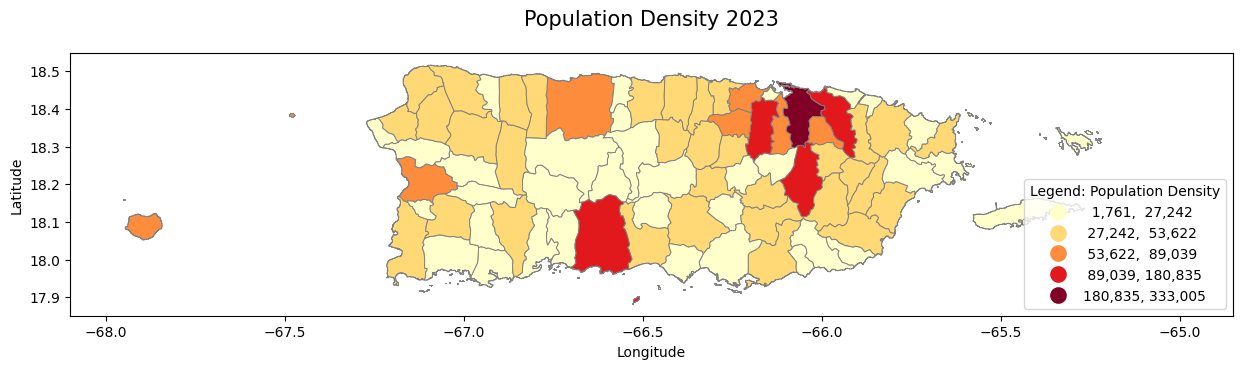

In [37]:
import matplotlib.pyplot as plt

# The map below displays the population density for all 78 towns in Puerto Rico in 2023
fig, ax = plt.subplots(1, figsize=(15, 25))
merged_data.plot(ax=ax, column='2023', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
                 edgecolor='grey', linewidth=.7,
                 legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title': 'Legend: Population Density',
                              'title_fontsize': 'medium', 'fontsize': 'medium', 'markerscale': 1.2})

# Set title and labels
ax.set_title('Population Density 2023', fontsize=15, pad=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


<Axes: >

Text(0.5, 1076.9498072604108, 'longitude')

Text(141.22222222222223, 0.5, 'latitude')

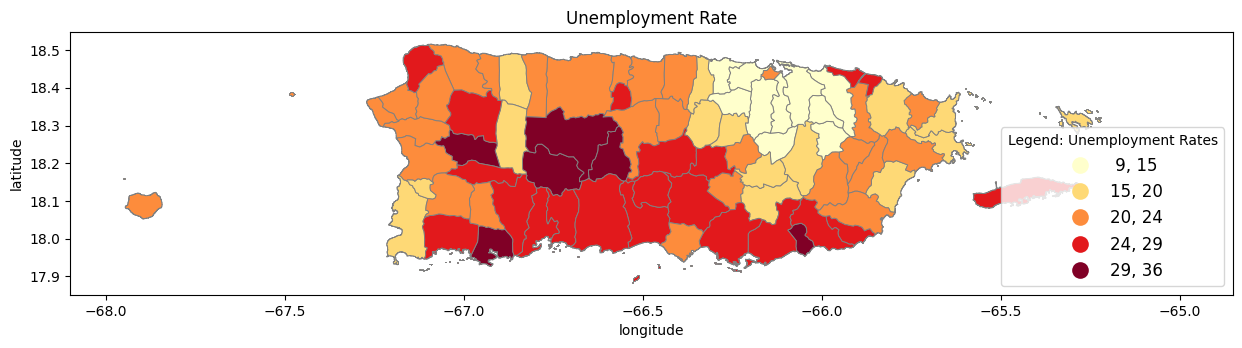

In [36]:
# The map below displays unemployment rartes for all 78 towns in Puerto Rico
fig, ax = plt.subplots(1, figsize=(15,25))

merged_data.plot(ax=ax,column='Tasa de desempleo (por ciento)', legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.7,
                 legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title': 'Legend: Unemployment Rates',
                              'title_fontsize': 'medium', 'fontsize': 'medium', 'markerscale': 1.2})

#prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Unemployment Rate")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')

In [19]:
#The file below is gastos_de_municipios.xlsx
#This file was downloaded from: https://www.observatoriofiscalpr.com/
df_spend = pd.read_excel("https://docs.google.com/uc?id=1vGW_nb6zrRDwOJD1FYtWNTalTaZXigJC&export=download")

# Save the DataFrame to a CSV file
df_spend.to_csv("spend.csv", index=False)

# Read the CSV file with float values
df_spendings = pd.read_csv("spend.csv")
#df_spendings.dtypes

#The file below is ingresos_de_municipios.xlsx
#This file was downloaded from: https://www.observatoriofiscalpr.com/
# Read the Excel file
df_income = pd.read_excel("https://docs.google.com/uc?id=1QZTTT75eSuesSEDKT5HwKf1EEAKgRoE_&export=download")

# Save the DataFrame to a CSV file
df_income.to_csv("incomes.csv", index=False)

# Read the CSV file with float values
df_incomes = pd.read_csv("incomes.csv")
#df_incomes.dtypes


#The file below is deuda-publica-de-municipi.xlsx
#This file was downloaded from: https://www.observatoriofiscalpr.com/
# Read the Excel file
df_debt = pd.read_excel("https://docs.google.com/uc?id=1vXF8gRDR0sO95TmAMm42gJ1XLgekBGWV&export=download")

# Save the DataFrame to a CSV file
df_debt.to_csv("debts.csv", index=False)

# Read the CSV file with float values
df_debts = pd.read_csv("debts.csv")
#df_debts.dtypes

Column Names: Index(['Age', '2020 Total\nPopulation ', '2020 Male', '2020 Female',
       '2021 Total\nPopulation', '2021 Male', '2021 Female',
       '2022 Total\nPopulation', '2022 Male', '2022 Female',
       '2023 Total\nPopulation', '2023 Male', '2023 Female'],
      dtype='object')


<BarContainer object of 86 artists>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Total Population')

Text(0.5, 1.0, 'Age vs 2020 Total Population')

<BarContainer object of 86 artists>

Text(0.5, 0, 'Age')

Text(0.5, 1.0, 'Age vs 2023 Total Population')

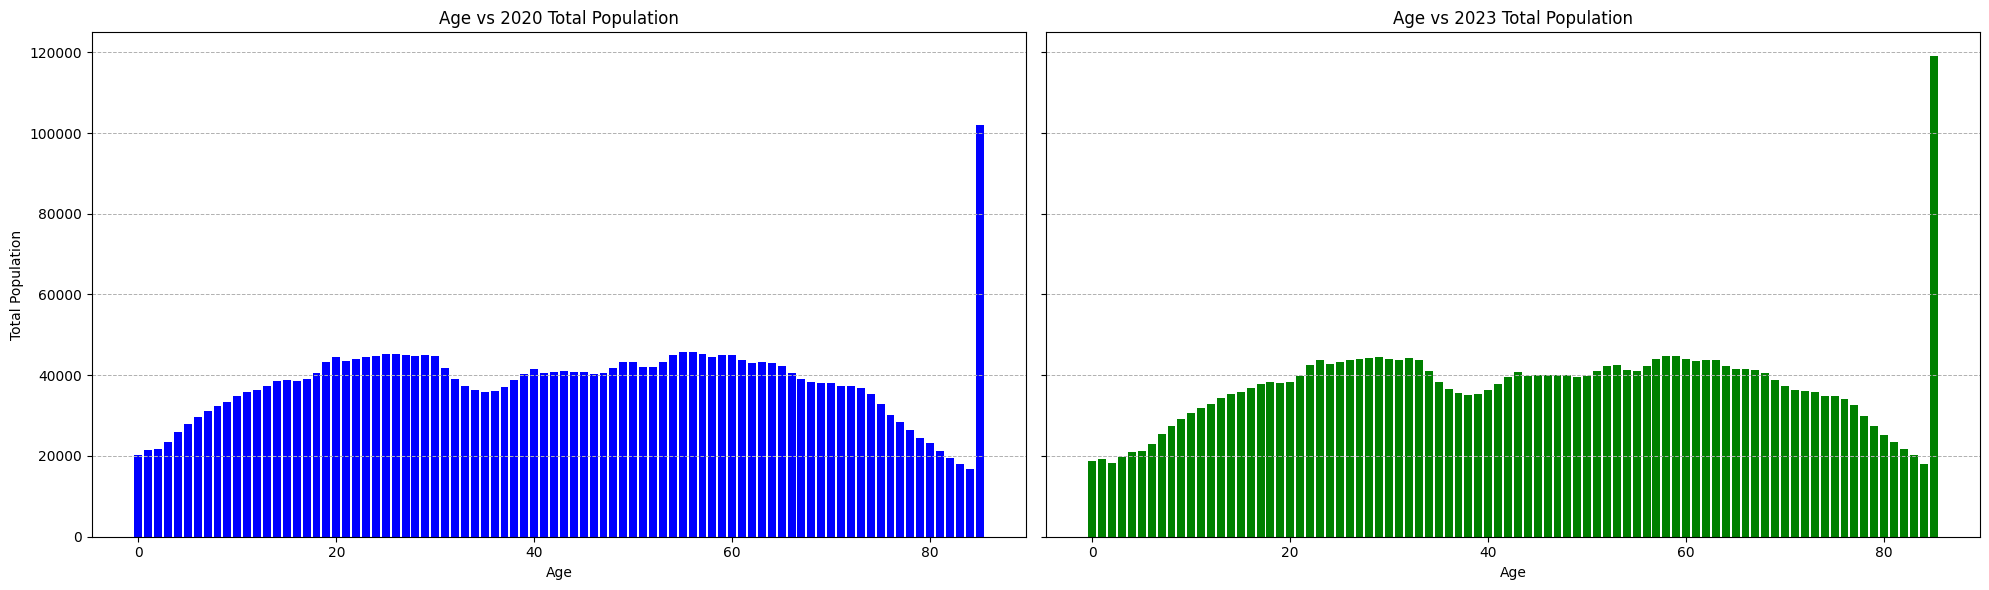

In [20]:
#The file below is Población_de_Puerto_Rico_desglosada_por_edad_sencilla_y_sexo_2020-2023.xlsx
#This file was downloaded from: https://www.observatoriofiscalpr.com/
# Read the Excel file
df_pop_count = pd.read_excel("https://docs.google.com/uc?id=1F17rr2JNpUaFBIEgvsXMY2QFjiGAhyc5&export=download")

# Save the DataFrame to a CSV file
df_pop_count.to_csv("pop_count.csv", index=False)

# Read the CSV file with float values
df_population_count = pd.read_csv("pop_count.csv")

# Remove rows from index 86 and above as they contain extra information that we don't need
df_population_count = df_population_count.iloc[:86]

# Remove the decimal point and '+' sign in the 'Age' column if present
df_population_count['Age'] = df_population_count['Age'].apply(lambda x: str(x).replace('.', '').replace('+', '') if '.' in str(x) or '+' in str(x) else str(x))

# Ensure 'Age' column is numeric
df_population_count['Age'] = pd.to_numeric(df_population_count['Age'])

# Identify the correct column names for '2020 Total Population' and '2023 Total Population'
print("Column Names:", df_population_count.columns)
column_name_2020 = [col for col in df_population_count.columns if '2020 Total' in col][0]
column_name_2023 = [col for col in df_population_count.columns if '2023 Total' in col][0]

# Create the subplots for 2020 and 2023 population data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# 2020 Population Histogram
ax1.bar(df_population_count['Age'], df_population_count[column_name_2020], color='blue')
ax1.set_xlabel('Age')
ax1.set_ylabel('Total Population')
ax1.set_title('Age vs 2020 Total Population')
ax1.grid(axis='y', linestyle='--', linewidth=0.7)

# 2023 Population Histogram
ax2.bar(df_population_count['Age'], df_population_count[column_name_2023], color='green')
ax2.set_xlabel('Age')
ax2.set_title('Age vs 2023 Total Population')
ax2.grid(axis='y', linestyle='--', linewidth=0.7)

# Show the plots side by side
plt.tight_layout()
plt.show()
#df_population_count



In [21]:

# Function to remove the specified phrase from each column name
def clean_column_name(column_name):
    return column_name.replace("Todos los tipos - ", "")

# Update the column names
df_debts.columns = [clean_column_name(col) for col in df_debts.columns]
df_spendings.columns = [clean_column_name(col) for col in df_debts.columns]
df_incomes.columns = [clean_column_name(col) for col in df_debts.columns]

# Save the modified DataFrame back to a CSV (if needed)
df_debts.to_csv('debts.csv', index=False)
df_spendings.to_csv('spendings.csv', index=False)
df_incomes.to_csv('incomes.csv', index=False)

# Display the updated DataFrame
#print(df_debts.head())
#print(df_spendings.head())
#print(df_incomes.head())




In [38]:

# Your replacements dictionary
replacements = {
    'Mayagüez': 'Mayaguez',
    'Canóvanas': 'Canovanas',
    'Comerío': 'Comerio',
    'Manatí': 'Manati',
    'San Sebastián': 'San Sebastian',
    'San Germán': 'San German',
    'Rincón': 'Rincon',
    'Juana Díaz': 'Juana Diaz',
    'Loíza': 'Loiza',
    'Bayamón': 'Bayamon',
    'Río Grande': 'Rio Grande',
    'Las Marías': 'Las Marias',
    'Guánica': 'Guanica'
}


# Function to replace words in the column name based on replacements dictionary
def replace_words(column_name, replacements):
    for old_word, new_word in replacements.items():
        if old_word in column_name:
            column_name = column_name.replace(old_word, new_word)
    return column_name

# Update the column names
df_debts.columns = [replace_words(col, replacements) for col in df_debts.columns]
df_spendings.columns = [replace_words(col, replacements) for col in df_spendings.columns]
df_incomes.columns = [replace_words(col, replacements) for col in df_incomes.columns]

# Create the "Puerto Rico" column by summing each row excluding the first column (Year)
df_debts['Puerto Rico'] = df_debts.iloc[:, 1:].sum(axis=1)
df_spendings['Puerto Rico'] = df_spendings.iloc[:, 1:].sum(axis=1)
df_incomes['Puerto Rico'] = df_incomes.iloc[:, 1:].sum(axis=1)

# Save the modified DataFrame back to a CSV (if needed)
#df_incomes.to_csv('modified_file.csv', index=False)
df_debts.to_csv('debts.csv', index=False)
df_spendings.to_csv('spendings.csv', index=False)
df_incomes.to_csv('incomes.csv', index=False)

# Display the updated DataFrame
#df_incomes.head()
#df_spendings.head()
#df_debts.head()

#

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Puerto Rico')

Text(0.5, 1.0, 'Puerto Rico - Debt Over Time')

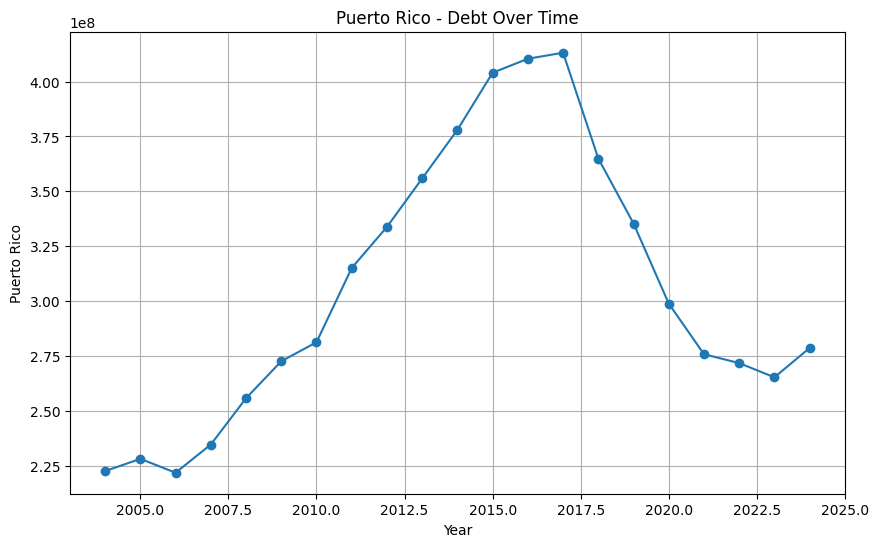

In [24]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_debts['Período fiscal'], df_debts['Puerto Rico'], marker='o')
#plt.plot(df_debts['Municipio'], df_debts['Puerto Rico'], marker='o')
plt.xlabel('Year')
plt.ylabel('Puerto Rico')
plt.title('Puerto Rico - Debt Over Time')
plt.grid(True)
plt.show()


In [39]:

# Load the incomes DataFrame
df_debts.to_csv('debts.csv', index=False)
df_spendings.to_csv('spendings.csv', index=False)
df_incomes = pd.read_csv('incomes.csv')

# Replace 'Período fiscal' with 'Municipio'
df_incomes.rename(columns={'Período fiscal': 'Municipio'}, inplace=True)
df_debts.rename(columns={'Período fiscal': 'Municipio'}, inplace=True)
df_spendings.rename(columns={'Período fiscal': 'Municipio'}, inplace=True)

# Save the modified DataFrame to a new CSV file
df_incomes.to_csv('updated_incomes.csv', index=False)
df_debts.to_csv('updated_debts.csv', index=False)
df_spendings.to_csv('updated_spendings.csv', index=False)

# Transpose the DataFrame
df_transposed_incomes = df_incomes.transpose()
df_transposed_debts = df_debts.transpose()
df_transposed_spendings = df_spendings.transpose()

# Save the transposed DataFrame to a new CSV file
df_transposed_incomes.to_csv('transposed_incomes.csv', index=True, header=False)
df_transposed_debts.to_csv('transposed_debts.csv', index=True, header=False)
df_transposed_spendings.to_csv('transposed_spendings.csv', index=True, header=False)



# Apply replacements in the 'Municipio' column
#df_transposed_debts['Municipio'] = df_transposed_debts['Municipio'].replace(replacements)
# Replace the words in the specified column (e.g., 'name' column)
#for old_word, new_word in replacements.items():
#    df_transposed_debts['Municipio'] = df_transposed_debts['Municipio'].str.replace(old_word, new_word)

# Display the transposed DataFrame
#df_transposed_debts.head(78)



In [40]:

# Load the transposed incomes DataFrame
df_transposed_incomes = pd.read_csv('transposed_incomes.csv')
df_transposed_debts = pd.read_csv('transposed_debts.csv')
df_transposed_spendings = pd.read_csv('transposed_spendings.csv')

# Scale down the float values to avoid exceeding field width
# We will multiply by a scaling factor to ensure the values fit
scaling_factor = 1e-6  # Adjust this factor as needed
float_columns = df_transposed_incomes.select_dtypes(include=['float64']).columns
df_transposed_incomes[float_columns] = df_transposed_incomes[float_columns].apply(lambda x: x * scaling_factor)

float_columns_debt = df_transposed_debts.select_dtypes(include=['float64']).columns
df_transposed_debts[float_columns] = df_transposed_debts[float_columns].apply(lambda x: x * scaling_factor)

float_columns_spendings = df_transposed_spendings.select_dtypes(include=['float64']).columns
df_transposed_spendings[float_columns] = df_transposed_spendings[float_columns].apply(lambda x: x * scaling_factor)

# Load the shapefile into a GeoDataFrame
prC2 = gpd.read_file('merged_shapefile.shp')

# Ensure the 'geometry' column remains intact
prC2 = prC2.set_geometry('geometry')

# Check if column names match
#print("df_transposed columns: ", df_transposed_incomes.columns)
#print("prC2 columns: ", prC2.columns)

# Perform the merge
try:
    merged_df = pd.merge(prC2, df_transposed_incomes, left_on='ADM1_ES', right_on='Municipio')
    merged_df_debt = pd.merge(prC2, df_transposed_debts, left_on='ADM1_ES', right_on='Municipio')
    merged_df_spendings = pd.merge(prC2, df_transposed_spendings, left_on='ADM1_ES', right_on='Municipio')
    print("Merge successful!")

    # Ensure the geometry column remains a GeoSeries
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')
    merged_df_debt = gpd.GeoDataFrame(merged_df_debt, geometry='geometry')
    merged_df_spendings = gpd.GeoDataFrame(merged_df_spendings, geometry='geometry')

    # Save the merged DataFrame to a new shapefile
    merged_df.to_file('merged_with_incomes.shp')
    merged_df_debt.to_file('merged_with_debts.shp')
    merged_df_spendings.to_file('merged_with_spendings.shp')
    print("File saved successfully!")

    # Display the merged DataFrame
    #print(merged_df.head())
    #print(merged_df_debt.head())
    #print(merged_df_spendings.head())
except Exception as e:
    print("Error during merge: ", e)





# Load the merged shapefile into a GeoDataFrame
merged_df = gpd.read_file('merged_with_incomes.shp')
merged_df_debt = gpd.read_file('merged_with_debts.shp')
merged_df_spendings = gpd.read_file('merged_with_spendings.shp')

# Ensure the 'geometry' column remains intact
#merged_df.dtypes
#merged_df_debt.dtypes
#merged_df_spendings.dtypes

# Save the GeoDataFrame to a CSV file
merged_df.to_csv('merged_with_incomes.csv', index=False)
merged_df_debt.to_csv('merged_with_debts.csv', index=False)
merged_df_spendings.to_csv('merged_with_spendings.csv', index=False)








Merge successful!
File saved successfully!


<Axes: >

Text(-66.06112777798862, 18.38693306735936, '*')

Text(0.5, 1.0, 'Town with Highest Debt')

Text(0.5, 1076.9498072604108, 'Longitude')

Text(141.22222222222223, 0.5, 'Latitude')

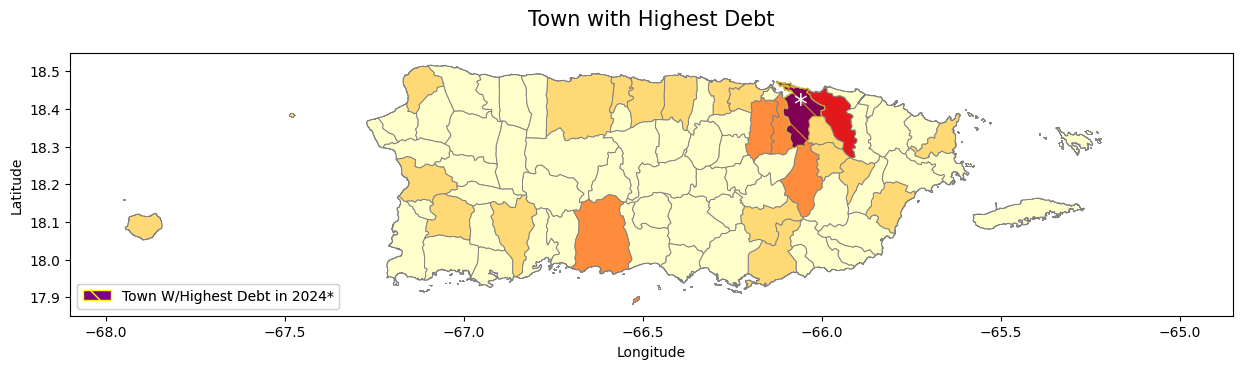

In [41]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import matplotlib.patches as patches
import matplotlib.patches as mpatches

# Find the Municipio with the highest '2024.0' value
max_value_index = merged_df_debt['2024.0'].idxmax()
max_value_municipio = merged_df_debt.loc[max_value_index, 'Municipio']
max_value_geometry = merged_df_debt.loc[max_value_index, 'geometry']

# Save to CSV
merged_df_debt.to_csv('merged_with_debts.csv', index=False)

# Plotting the map
fig, ax = plt.subplots(1, figsize=(15, 25))
merged_df_debt.plot(ax=ax, column='2024.0', legend=True, cmap='YlOrRd',
                    scheme='natural_breaks', k=5, edgecolor='grey', linewidth=.7,
                    legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'large',
                                 'fontsize': 'large', 'markerscale': 1.2})

# Highlight the Municipio with the highest 2024.0 value with a purple patch and yellow borders
if isinstance(max_value_geometry, Polygon):
    patch = patches.Polygon(list(max_value_geometry.exterior.coords), closed=True, fill=True, edgecolor='yellow', facecolor='purple', hatch='\\', alpha=0.5)
    ax.add_patch(patch)

    # Print the white star symbol on top of the highest value Municipio
    ax.annotate('*', xy=(max_value_geometry.centroid.x, max_value_geometry.centroid.y), color='white', fontsize=20, ha='center')

# Create a legend patch for the highlighted area with a star symbol
purple_patch = mpatches.Patch(edgecolor='yellow', facecolor='purple', hatch='\\', label='Town W/Highest Debt in 2024*')
l2 = plt.legend(handles=[purple_patch], loc='lower left')
ax.add_artist(l2)

# Set labels
ax.set_title('Town with Highest Debt', fontsize=15, pad=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


<Axes: >

Text(-66.06112777798862, 18.38693306735936, '1')

Text(-65.95683113002094, 18.37498609150553, '2')

Text(-66.05077856234476, 18.211614856430725, '3')

Text(-66.11452302441607, 18.345113586240753, '4')

Text(-66.16843479017366, 18.349459705764293, '5')

Text(0.5, 1.0, 'Debt by Town (Top 5 Highest Debts)')

Text(0.5, 1076.9498072604108, 'Longitude')

Text(141.22222222222223, 0.5, 'Latitude')

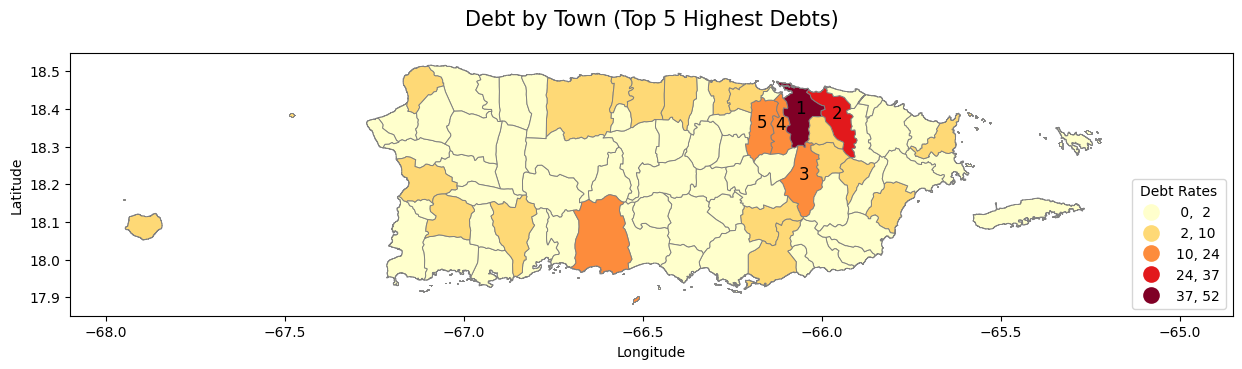

In [42]:
import matplotlib.pyplot as plt

# Save to CSV
merged_df_debt.to_csv('merged_with_debts.csv', index=False)

# Find the top 10 Municipio with the highest '2024.0' values
top_5 = merged_df_debt.nlargest(5, '2024.0')

# Plotting the map
fig, ax = plt.subplots(1, figsize=(15, 25))
merged_df_debt.plot(ax=ax, column='2024.0', legend=True, cmap='YlOrRd',
                    scheme='natural_breaks', k=5, edgecolor='grey', linewidth=.7,
                    legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title': 'Debt Rates',
                              'title_fontsize': 'medium', 'fontsize': 'medium', 'markerscale': 1.2})

# Highlight the top 10 Municipios with the highest 2024.0 values
for rank, row in enumerate(top_5.itertuples(), start=1):
    ax.annotate(str(rank), xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=12, ha='center')

# Set labels
ax.set_title('Debt by Town (Top 5 Highest Debts)', fontsize=15, pad=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [30]:
merged_data_debt = pd.read_csv('merged_with_debts.csv')
merged_data_debt['Difference_2023_2024'] = (merged_data_debt['2024.0'].astype(float) - merged_data_debt['2023.0'].astype(float))*1000000
# Create a new column 'Difference_Symbol' for hover tooltips
merged_data_debt['Difference_Symbol'] = merged_data_debt['Difference_2023_2024'].apply(lambda x: '↑' if x > 0 else '↓')
merged_data_debt['2024_Status'] = merged_data_debt['Difference_2023_2024'].apply(lambda x: 'Debt increased in 2024' if x > 0 else 'Debt decreased in 2024')
#merged_data_debt
merged_data_debt.to_csv('merged_with_debts.csv', index=False)

In [31]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, GeoJSONDataSource, CategoricalColorMapper
from bokeh.palettes import Category20
import json

# Enable Bokeh to display plots in the notebook
output_notebook()

# Load the merged data
merged_with_incomes = pd.read_csv('merged_with_incomes.csv')
merged_data_debt = pd.read_csv('merged_with_debts.csv')
merged_data_spendings = pd.read_csv('merged_with_spendings.csv')

# Convert the DataFrame to a GeoDataFrame
merged_with_incomes['geometry'] = merged_with_incomes['geometry'].apply(wkt.loads)
merged_data_debt['geometry'] = merged_data_debt['geometry'].apply(wkt.loads)
merged_data_spendings['geometry'] = merged_data_spendings['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(merged_with_incomes, geometry='geometry')
gdf_debt = gpd.GeoDataFrame(merged_data_debt, geometry='geometry')
gdf_spendings = gpd.GeoDataFrame(merged_data_spendings, geometry='geometry')

# Ensure the CRS is set correctly
gdf.set_crs(epsg=4326, inplace=True)
gdf_debt.set_crs(epsg=4326, inplace=True)
gdf_spendings.set_crs(epsg=4326, inplace=True)

# Convert GeoDataFrame to GeoJSON
gdf_json = json.loads(gdf.to_json())
gdf_json_debt = json.loads(gdf_debt.to_json())
gdf_json_spendings = json.loads(gdf_spendings.to_json())

# Create a GeoJSONDataSource
geo_source = GeoJSONDataSource(geojson=json.dumps(gdf_json))
geo_source_debt = GeoJSONDataSource(geojson=json.dumps(gdf_json_debt))
geo_source_spendings = GeoJSONDataSource(geojson=json.dumps(gdf_json_spendings))

# Create a more rectangular figure
p = figure(title="Towns in Puerto Rico",
           height=350, width=1500,  # Increased width for a more rectangular shape
           tools="pan,wheel_zoom,box_zoom,reset,hover,save",
           tooltips=[("Town", "@ADM1_ES")])

p_debt = figure(title="Debt for Towns in Puerto Rico",
           height=350, width=1500,  # Increased width for a more rectangular shape
           tools="pan,wheel_zoom,box_zoom,reset,hover,save",
           tooltips=[("Town", "@ADM1_ES"), ("", "@Difference_2023_2024"), ("debt", "@Difference_Symbol")])

# Center the title
p_debt.title.align = 'center'

# Generate a custom color palette
unique_towns = gdf['ADM1_ES'].unique().tolist()
unique_towns_debt = gdf_debt['ADM1_ES'].unique().tolist()
unique_towns_spendings = gdf_spendings['ADM1_ES'].unique().tolist()
palette_size = len(unique_towns)
palette_size_debt = len(unique_towns_debt)
palette_size_spendings = len(unique_towns_spendings)

# Use Category20 and repeat it as necessary
extended_palette = (Category20[20] * (palette_size // 20 + 1))[:palette_size]
extended_palette_debt = (Category20[20] * (palette_size_debt // 20 + 1))[:palette_size_debt]
extended_palette_spendings = (Category20[20] * (palette_size_spendings // 20 + 1))[:palette_size_spendings]

# Define a color mapper using the extended palette
color_mapper = CategoricalColorMapper(factors=unique_towns, palette=extended_palette)
color_mapper_debt = CategoricalColorMapper(factors=unique_towns, palette=extended_palette_debt)
color_mapper_spendings = CategoricalColorMapper(factors=unique_towns, palette=extended_palette_spendings)

# Add patches for the geometries
p.patches('xs', 'ys', source=geo_source,
          fill_color={'field': 'ADM1_ES', 'transform': color_mapper},
          line_color="black", line_width=0.25, fill_alpha=0.7)

p_debt.patches('xs', 'ys', source=geo_source_debt,
          fill_color={'field': 'ADM1_ES', 'transform': color_mapper_debt},
          line_color="black", line_width=0.25, fill_alpha=0.7)

# Show the plot
#show(p)
show(p_debt)


,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,Municipio,2004.0,2005.0,2006.0,2007.0,2008.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,geometry
0,Puerto Rico,PR,Añasco,PR06,Añasco,9.993678,9.179202,8.928587,8.833159,10.238366,...,13.045675,13.048928,10.861982,11.500000,11.987584,12.057440,11.056802,11.403640,11.445606,"POLYGON ((-67.18903 18.26622, -67.18903 18.266..."
1,Puerto Rico,PR,Adjuntas,PR01,Adjuntas,6.044585,6.711472,6.690648,7.101650,7.640814,...,9.045182,9.092764,7.604271,7.790914,7.790913,5.846741,4.441021,7.350629,7.469215,"POLYGON ((-66.79774 18.13365, -66.80194 18.139..."
2,Puerto Rico,PR,Aguada,PR02,Aguada,9.859498,9.972950,11.087792,11.458527,12.426490,...,14.714278,14.976832,13.465448,11.550190,10.978750,11.201164,9.726652,9.679819,10.164622,"POLYGON ((-67.13012 18.31805, -67.13705 18.316..."
3,Puerto Rico,PR,Aguadilla,PR03,Aguadilla,23.091671,24.315627,23.656509,24.963150,NaN,...,30.593190,29.548865,21.965933,14.554839,18.632447,21.273908,20.342282,19.849274,23.198037,"POLYGON ((-67.05623 18.46092, -67.07426 18.456..."
4,Puerto Rico,PR,Aguas Buenas,PR04,Aguas Buenas,6.640325,7.233957,8.295756,8.604253,9.061787,...,9.826186,9.353753,8.588978,8.321508,8.505557,7.291422,6.651821,7.001045,7.406742,"POLYGON ((-66.16881 18.22423, -66.17622 18.229..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Puerto Rico,PR,Vega Baja,PR74,Vega Baja,20.608125,21.874844,27.895813,21.611830,22.020920,...,17.548870,18.054835,14.138075,13.596571,14.029274,13.335873,14.521600,18.605470,21.694212,"POLYGON ((-66.34959 18.48347, -66.34956 18.479..."
74,Puerto Rico,PR,Vieques,PR75,Vieques,7.926417,8.915708,9.450000,9.500000,11.000000,...,13.305436,13.862701,9.957705,12.454076,11.402895,13.085498,10.747961,12.858207,13.834284,"MULTIPOLYGON (((-65.43347 18.09153, -65.43819 ..."
75,Puerto Rico,PR,Villalba,PR76,Villalba,8.321309,8.459552,9.182560,9.674886,11.214081,...,14.412574,14.270369,11.835287,12.362050,14.252623,14.199835,14.579247,14.051380,14.514348,"POLYGON ((-66.43031 18.08219, -66.43401 18.083..."
76,Puerto Rico,PR,Yabucoa,PR77,Yabucoa,10.200332,NaN,13.714550,14.737180,16.699031,...,15.475295,15.386805,13.672733,13.077945,15.516745,16.322003,15.774087,14.429274,15.151066,"POLYGON ((-65.98853 18.05886, -65.99869 18.060..."


,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,Municipio,2004.0,2005.0,2006.0,2007.0,2008.0,...,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,geometry,Difference_2023_2024,Difference_Symbol,2024_Status
0,Puerto Rico,PR,Añasco,PR06,Añasco,0.838482,0.883658,1.026352,1.005989,1.095204,...,1.104302,0.879301,0.773564,0.804711,0.760973,0.682442,"POLYGON ((-67.18903 18.26622, -67.18903 18.266...",-78531.0,↓,Debt decreased in 2024
1,Puerto Rico,PR,Adjuntas,PR01,Adjuntas,0.300340,0.291599,0.367162,0.363512,0.489477,...,0.713115,0.687192,0.688411,0.694984,0.705310,0.701931,"POLYGON ((-66.79774 18.13365, -66.80194 18.139...",-3379.0,↓,Debt decreased in 2024
2,Puerto Rico,PR,Aguada,PR02,Aguada,0.650741,0.716562,0.660020,0.671264,0.877697,...,1.186253,0.619740,0.507047,0.441517,0.251917,0.250862,"POLYGON ((-67.13012 18.31805, -67.13705 18.316...",-1055.0,↓,Debt decreased in 2024
3,Puerto Rico,PR,Aguadilla,PR03,Aguadilla,2.883462,3.195490,3.058412,3.536390,3.929276,...,5.759116,5.180130,5.015904,4.956288,5.101876,5.291945,"POLYGON ((-67.05623 18.46092, -67.07426 18.456...",190069.0,↑,Debt increased in 2024
4,Puerto Rico,PR,Aguas Buenas,PR04,Aguas Buenas,0.379332,0.413949,0.563038,0.425655,0.665323,...,0.364732,0.231026,0.232738,0.157829,0.155264,0.132196,"POLYGON ((-66.16881 18.22423, -66.17622 18.229...",-23068.0,↓,Debt decreased in 2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Puerto Rico,PR,Vega Baja,PR74,Vega Baja,2.962356,3.130443,2.585037,2.866253,2.795893,...,3.867397,3.382265,2.669371,2.763485,2.771832,2.706856,"POLYGON ((-66.34959 18.48347, -66.34956 18.479...",-64976.0,↓,Debt decreased in 2024
74,Puerto Rico,PR,Vieques,PR75,Vieques,0.214020,0.215310,0.216198,0.362496,0.380025,...,0.734816,0.741525,0.680732,0.714970,0.740678,0.795596,"MULTIPOLYGON (((-65.43347 18.09153, -65.43819 ...",54918.0,↑,Debt increased in 2024
75,Puerto Rico,PR,Villalba,PR76,Villalba,0.260280,0.202018,0.491683,0.502793,0.532558,...,0.433789,0.591013,0.408406,0.456691,0.450972,0.423983,"POLYGON ((-66.43031 18.08219, -66.43401 18.083...",-26989.0,↓,Debt decreased in 2024
76,Puerto Rico,PR,Yabucoa,PR77,Yabucoa,1.039476,1.126270,1.124578,1.102053,1.328347,...,1.455990,1.240183,1.043881,1.096827,1.113263,1.233080,"POLYGON ((-65.98853 18.05886, -65.99869 18.060...",119817.0,↑,Debt increased in 2024


,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,Municipio,2004.0,2005.0,2006.0,2007.0,2008.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,geometry
0,Puerto Rico,PR,Añasco,PR06,Añasco,9.993678,9.179202,8.928587,8.833159,10.238366,...,13.045675,13.048928,10.861982,11.500000,11.987584,12.057440,11.056802,11.403640,11.445606,"POLYGON ((-67.18903 18.26622, -67.18903 18.266..."
1,Puerto Rico,PR,Adjuntas,PR01,Adjuntas,6.044585,6.711472,6.690648,7.101650,7.640814,...,9.045182,9.092764,7.604271,7.790914,7.790913,5.846741,4.441021,7.350630,7.469215,"POLYGON ((-66.79774 18.13365, -66.80194 18.139..."
2,Puerto Rico,PR,Aguada,PR02,Aguada,9.859498,9.972950,11.087792,11.458527,12.426490,...,14.714278,14.976832,13.465448,11.550190,10.978750,11.201164,9.726652,9.679819,10.164622,"POLYGON ((-67.13012 18.31805, -67.13705 18.316..."
3,Puerto Rico,PR,Aguadilla,PR03,Aguadilla,23.091671,24.315627,23.656509,24.963150,NaN,...,30.593190,29.548865,21.965933,14.554839,18.632447,21.273908,20.342282,19.849275,23.198037,"POLYGON ((-67.05623 18.46092, -67.07426 18.456..."
4,Puerto Rico,PR,Aguas Buenas,PR04,Aguas Buenas,6.640325,7.233957,8.295756,8.604253,9.061787,...,9.826186,9.353753,8.588978,8.321508,8.505557,7.291422,6.651821,7.001045,7.406742,"POLYGON ((-66.16881 18.22423, -66.17622 18.229..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Puerto Rico,PR,Vega Baja,PR74,Vega Baja,20.608125,21.874844,27.895813,21.611831,22.020920,...,17.548870,18.054835,14.138075,13.596571,14.029274,13.335873,14.521600,18.605470,21.694212,"POLYGON ((-66.34959 18.48347, -66.34956 18.479..."
74,Puerto Rico,PR,Vieques,PR75,Vieques,7.926417,8.915708,9.450000,9.500000,11.000000,...,13.305436,13.862701,9.957705,12.454076,11.402895,13.085498,10.747960,12.858207,13.834284,"MULTIPOLYGON (((-65.43347 18.09153, -65.43819 ..."
75,Puerto Rico,PR,Villalba,PR76,Villalba,8.321309,8.459552,9.182560,9.674886,11.214080,...,14.412574,14.270369,11.835287,12.362050,14.252623,14.199835,14.579247,14.051380,14.514348,"POLYGON ((-66.43031 18.08219, -66.43401 18.083..."
76,Puerto Rico,PR,Yabucoa,PR77,Yabucoa,10.200332,NaN,13.714550,14.737180,16.699031,...,15.475295,15.386805,13.672733,13.077945,15.516745,16.322003,15.774087,14.429275,15.151066,"POLYGON ((-65.98853 18.05886, -65.99869 18.060..."


GlyphRenderer(id='p1085', ...)

GlyphRenderer(id='p1096', ...)

In [32]:
import pandas as pd
import geopandas as gpd
import folium
from shapely import wkt

#merged_df = gpd.read_file('merged_with_incomes.shp')
#merged_df.to_csv('merged_with_incomes.csv', index=False)

# Load the merged data
merged_with_incomes = pd.read_csv('merged_with_incomes.csv')

# Convert the DataFrame to a GeoDataFrame
merged_with_incomes['geometry'] = merged_with_incomes['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(merged_with_incomes, geometry='geometry')

# Set the CRS (assuming WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Initialize the map centered around Puerto Rico
m = folium.Map(location=[18.2208, -66.5901], zoom_start=10)

# Add GeoJson to the map with popup data from 'ADM1_ES'
folium.GeoJson(
    gdf,
    tooltip=folium.GeoJsonTooltip(fields=['ADM1_ES'], aliases=['Town: '])
).add_to(m)

# Save the map to an HTML file
m.save('map_with_geometry.html')

# Display the map (if you're running this in a Jupyter notebook, otherwise, open the saved HTML file)
m


,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,Municipio,2004.0,2005.0,2006.0,2007.0,2008.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,geometry
0,Puerto Rico,PR,Añasco,PR06,Añasco,9.993678,9.179202,8.928587,8.833159,10.238366,...,13.045675,13.048928,10.861982,11.500000,11.987584,12.057440,11.056802,11.403640,11.445606,"POLYGON ((-67.18903 18.26622, -67.18903 18.266..."
1,Puerto Rico,PR,Adjuntas,PR01,Adjuntas,6.044585,6.711472,6.690648,7.101650,7.640814,...,9.045182,9.092764,7.604271,7.790914,7.790913,5.846741,4.441021,7.350629,7.469215,"POLYGON ((-66.79774 18.13365, -66.80194 18.139..."
2,Puerto Rico,PR,Aguada,PR02,Aguada,9.859498,9.972950,11.087792,11.458527,12.426490,...,14.714278,14.976832,13.465448,11.550190,10.978750,11.201164,9.726652,9.679819,10.164622,"POLYGON ((-67.13012 18.31805, -67.13705 18.316..."
3,Puerto Rico,PR,Aguadilla,PR03,Aguadilla,23.091671,24.315627,23.656509,24.963150,NaN,...,30.593190,29.548865,21.965933,14.554839,18.632447,21.273908,20.342282,19.849274,23.198037,"POLYGON ((-67.05623 18.46092, -67.07426 18.456..."
4,Puerto Rico,PR,Aguas Buenas,PR04,Aguas Buenas,6.640325,7.233957,8.295756,8.604253,9.061787,...,9.826186,9.353753,8.588978,8.321508,8.505557,7.291422,6.651821,7.001045,7.406742,"POLYGON ((-66.16881 18.22423, -66.17622 18.229..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Puerto Rico,PR,Vega Baja,PR74,Vega Baja,20.608125,21.874844,27.895813,21.611830,22.020920,...,17.548870,18.054835,14.138075,13.596571,14.029274,13.335873,14.521600,18.605470,21.694212,"POLYGON ((-66.34959 18.48347, -66.34956 18.479..."
74,Puerto Rico,PR,Vieques,PR75,Vieques,7.926417,8.915708,9.450000,9.500000,11.000000,...,13.305436,13.862701,9.957705,12.454076,11.402895,13.085498,10.747961,12.858207,13.834284,"MULTIPOLYGON (((-65.43347 18.09153, -65.43819 ..."
75,Puerto Rico,PR,Villalba,PR76,Villalba,8.321309,8.459552,9.182560,9.674886,11.214081,...,14.412574,14.270369,11.835287,12.362050,14.252623,14.199835,14.579247,14.051380,14.514348,"POLYGON ((-66.43031 18.08219, -66.43401 18.083..."
76,Puerto Rico,PR,Yabucoa,PR77,Yabucoa,10.200332,NaN,13.714550,14.737180,16.699031,...,15.475295,15.386805,13.672733,13.077945,15.516745,16.322003,15.774087,14.429274,15.151066,"POLYGON ((-65.98853 18.05886, -65.99869 18.060..."


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Puerto Rico')

Text(0.5, 1.0, 'Puerto Rico - Income Over Time')

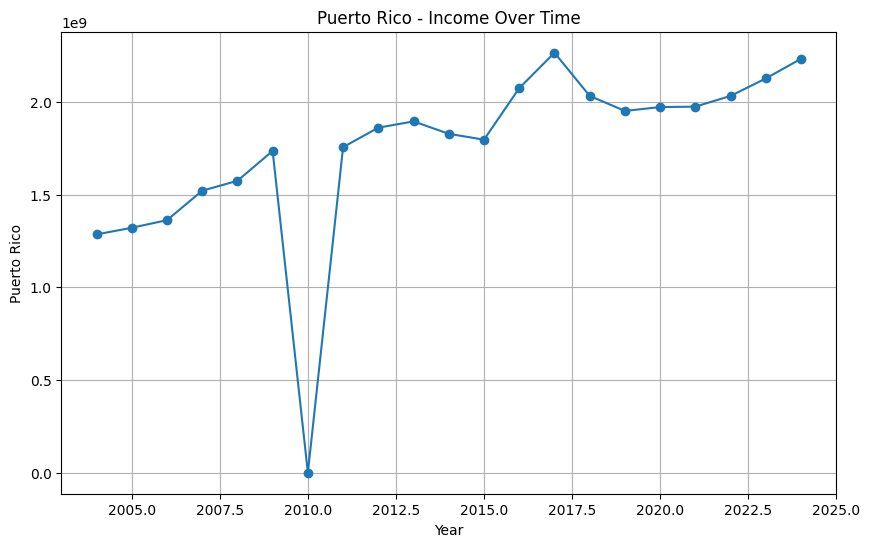

In [23]:

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_incomes['Período fiscal'], df_incomes['Puerto Rico'], marker='o')
#plt.plot(df_incomes['Municipio'], df_incomes['Puerto Rico'], marker='o')
plt.xlabel('Year')
plt.ylabel('Puerto Rico')
plt.title('Puerto Rico - Income Over Time')
plt.grid(True)
#plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Puerto Rico')

Text(0.5, 1.0, 'Puerto Rico - Spendings Over Time')

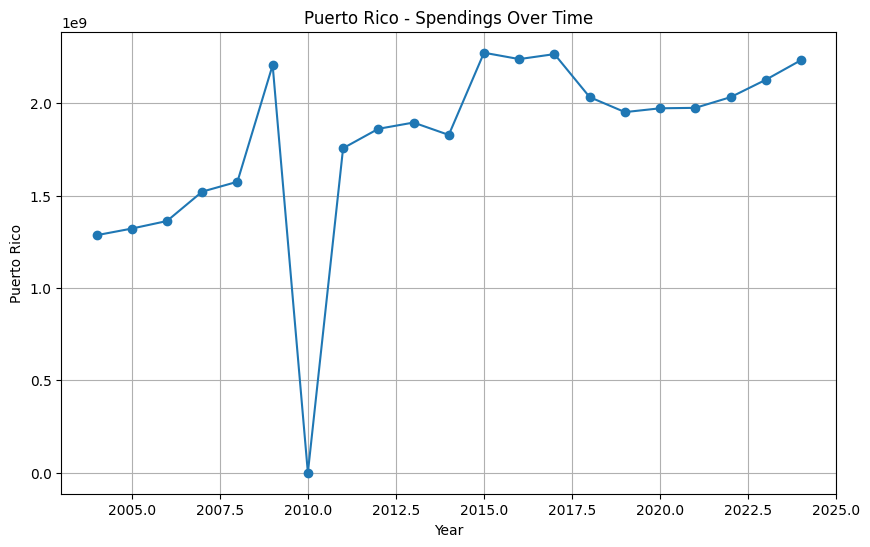

In [25]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_spendings['Período fiscal'], df_spendings['Puerto Rico'], marker='o')
#plt.plot(df_spendings['Municipio'], df_spendings['Puerto Rico'], marker='o')
plt.xlabel('Year')
plt.ylabel('Puerto Rico')
plt.title('Puerto Rico - Spendings Over Time')
plt.grid(True)
#plt.show()